In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading csv file to python

file = pd.read_csv("./train.csv")
df = pd.DataFrame(file)


In [3]:
# checking the data

df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# getting info about the data that is being worked with

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
for column in df.columns:
    print(df[column].value_counts())
    print("\n\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64



0    549
1    342
Name: Survived, dtype: int64



3    491
1    216
2    184
Name: Pclass, dtype: int64



Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64



male      577
female    314
Name: Sex, dtype: int64



24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, L

In [6]:
# checking null values in each column

print(df.isna().sum(axis = 0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


    Cabin has a lot of missing values. Therefore its better to remove that column from the analysis.

    Age mostly will correlate to the accident. So replace with mean age
    Embarked has only 2 missing values. So only the records(rows) can be deleted

    Convert Gender column into boolean to help with analysis


In [7]:
# drop cabin column
df.drop(["Cabin"], axis = 1, inplace = True)

# replace NaN age with mean age
mean_age = df["Age"].mean()
df["Age"].replace(np.NaN, mean_age, inplace = True)

# drop any other row with NaN in it
df.dropna(axis = 0, inplace = True)

# convert gender column into boolean form. 
# MALE --> 1, FEMALE --> 0
# Embarked from: S --> 0, C --> 1, Q --> 2
df.replace({"Sex" : {"male" : 1, "female" : 0}, "Embarked" : {"S" : 0, "C" : 1, "Q" : 2}}, inplace = True)


Most of the checks have already been done and info of each row has been given on kaggle: https://www.kaggle.com/c/titanic/data?select=train.csv

In [8]:
# check data after changes
print(df.isna().sum(axis = 0))
df.info()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


-----------------------------------------------UNIVARIATE ANALYSIS-----------------------------------------------

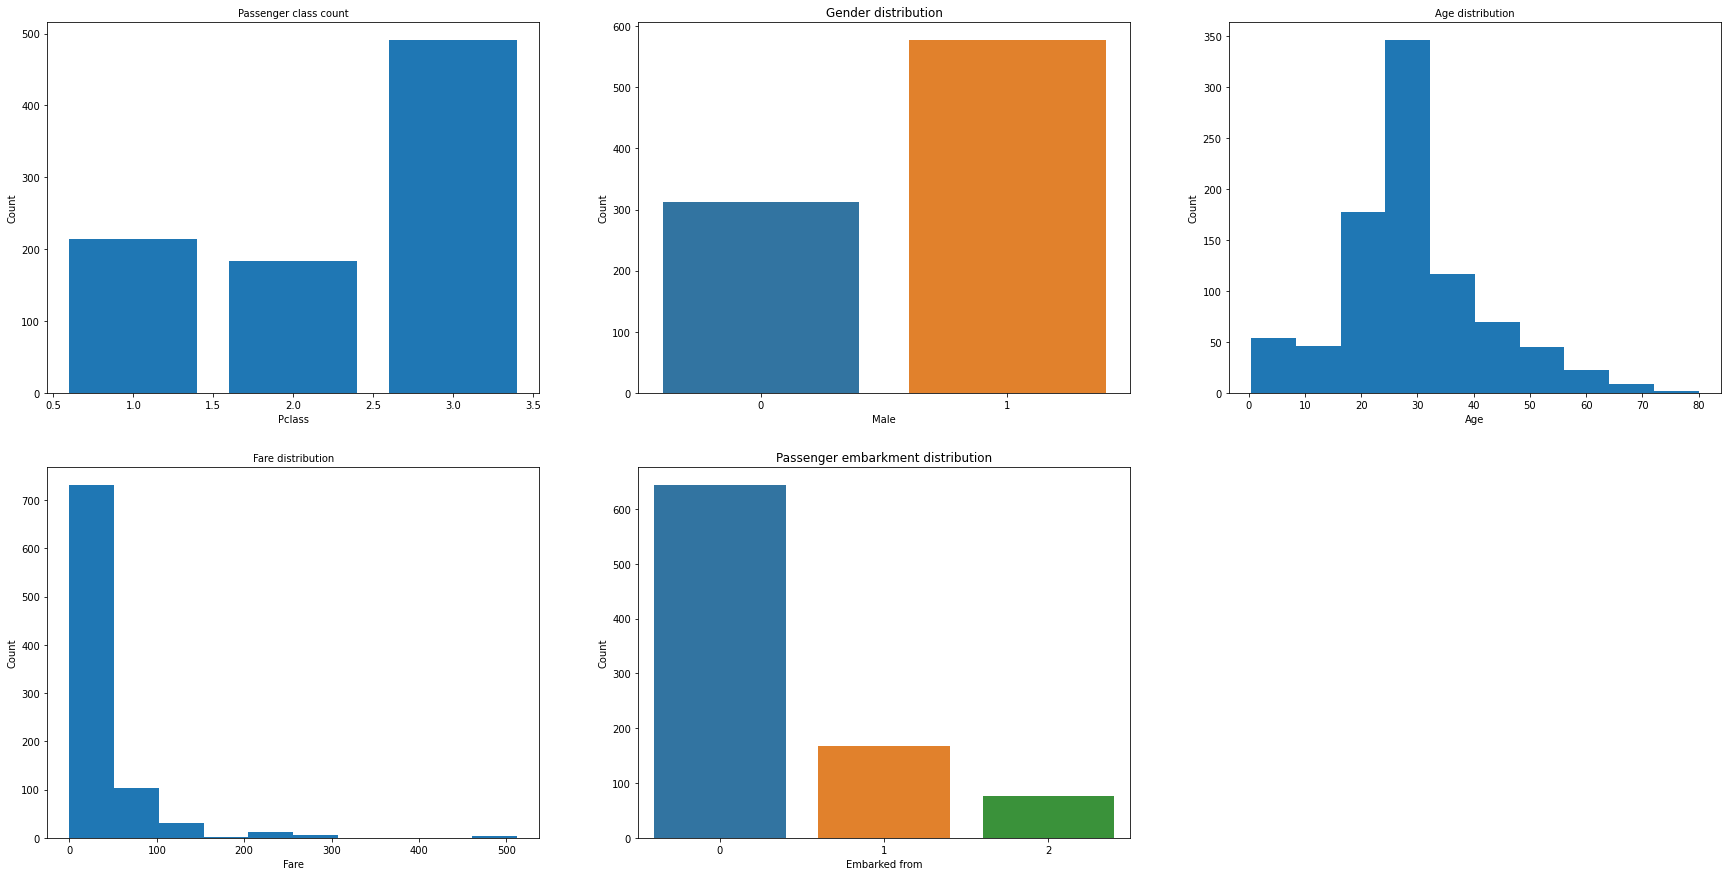

In [9]:
fig = plt.figure(figsize = (30, 15))

plt.subplot(2, 3, 1)
plt.bar(df["Pclass"].unique(), df["Pclass"].value_counts())
plt.xlabel("Pclass", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.title("Passenger class count", fontsize = 10)

plt.subplot(2, 3, 2)
sns.barplot(x = df["Sex"].unique(), y = df["Sex"].value_counts())
# plt.bar(df["Sex"].unique(), df["Sex"].value_counts())
plt.xlabel("Male", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.title("Gender distribution")

plt.subplot(2, 3, 3)
plt.hist(df["Age"])
plt.xlabel("Age", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.title("Age distribution", fontsize = 10)

plt.subplot(2, 3, 4)
plt.hist(df["Fare"])
plt.xlabel("Fare", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.title("Fare distribution", fontsize = 10)

plt.subplot(2, 3, 5)
sns.barplot(x = df["Embarked"].unique(), y = df["Embarked"].value_counts())
plt.xlabel("Embarked from", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.title("Passenger embarkment distribution")

plt.show()

-----------------------------------------------BIVARIATE ANALYSIS-----------------------------------------------

In [10]:
# check correlation between columns
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030300,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.043835
Sex,0.043136,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,-0.118593
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,0.009499
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,-0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000


HAVE TO ANALYSE:
1. Relation between Passenger Class and Survival
2. Relation between Gender and Survival
3. Relation between Age and Survival
4. Relation between Embarked and Survival

,Pclass,Survived
Pclass,1.000000,-0.335549
Survived,-0.335549,1.000000


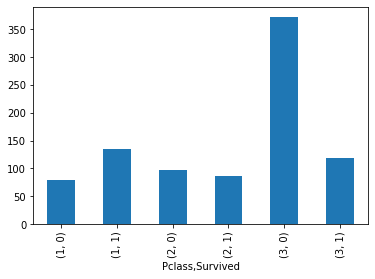

In [11]:
# Relation between Passenger Class and Survival
df.groupby(["Pclass", "Survived"], as_index = True).size().plot(kind = "bar")
df[["Pclass", "Survived"]].corr()

,Sex,Survived
Sex,1.000000,-0.541585
Survived,-0.541585,1.000000


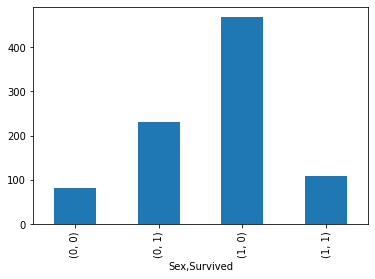

In [12]:
# Relation between Gender and Survival
df.groupby(["Sex", "Survived"], as_index = True).size().plot(kind = "bar")
df[["Sex", "Survived"]].corr()

,Age,Survived
Age,1.000000,-0.074673
Survived,-0.074673,1.000000


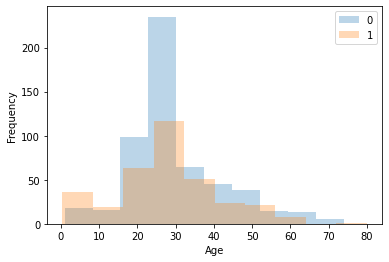

In [13]:
# Relation between Age and Survival
df.groupby(["Survived"], as_index = True)["Age"].plot(kind = "hist", legend = True, alpha = 0.3)
plt.xlabel("Age")
df[["Age", "Survived"]].corr()

,Embarked,Survived
Embarked,1.000000,0.108669
Survived,0.108669,1.000000


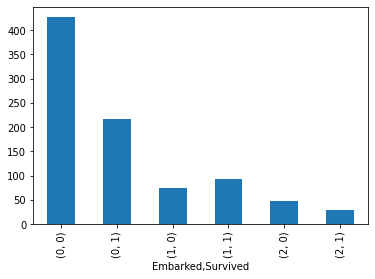

In [14]:
# Relation between Embarked and Survival
df.groupby(["Embarked", "Survived"], as_index = True).size().plot(kind = "bar")
df[["Embarked", "Survived"]].corr()

In [15]:
# for easier reference 
df.info()
df.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030300,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.043835
Sex,0.043136,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,-0.118593
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,0.009499
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,-0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000


Create different models and see which suits best 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

In [17]:
# MODEL 1 - Logistic Regression
"""
Columns that are not required
    - PassengerID
    - Name
    - Survived
    - Ticket
"""

Model1_DataFrame_x = df.drop(["PassengerId", "Name", "Survived", "Ticket"], axis = 1)
Model1_DataFrame_y = df["Survived"]

Model1_DataFrame_x.info()

M1_x_train, M1_x_test, M1_y_train, M1_y_test = train_test_split(Model1_DataFrame_x, Model1_DataFrame_y, train_size = 0.7, random_state = 42)

Model1 = LogisticRegression()
Model1.fit(M1_x_train, M1_y_train)

M1_y_train_predicted = Model1.predict(M1_x_train)

M1_train_Accuracy = accuracy_score(M1_y_train, M1_y_train_predicted)

print("Accuracy of model (using accuracy_score) : ", M1_train_Accuracy)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB
Accuracy of model (using accuracy_score) :  0.7958199356913184


In [18]:
# MODEL 2 - Logistic Regression
"""
Columns that are not required
    - PassengerID
    - Name
    - Survived
    - Ticket
    - SibSp	
    - Parch
"""

Model2_DataFrame_x = df.drop(["PassengerId", "Name", "Survived", "Ticket", "SibSp", "Parch"], axis = 1)
Model2_DataFrame_y = df["Survived"]

Model2_DataFrame_x.info()

M2_x_train, M2_x_test, M2_y_train, M2_y_test = train_test_split(Model2_DataFrame_x, Model2_DataFrame_y, train_size = 0.7, random_state = 42)

Model2 = LogisticRegression()
Model2.fit(M2_x_train, M2_y_train)

M2_y_train_predicted = Model2.predict(M2_x_train)

M2_train_Accuracy = accuracy_score(M2_y_train, M2_y_train_predicted)

print("Accuracy of model (using accuracy_score) : ", M2_train_Accuracy)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   Fare      889 non-null    float64
 4   Embarked  889 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 41.7 KB
Accuracy of model (using accuracy_score) :  0.7990353697749196


In [19]:
# MODEL 3 - SVM
"""
Columns that are not required
    - PassengerID
    - Name
    - Survived
    - Ticket
"""

Model3_DataFrame_x = df.drop(["PassengerId", "Name", "Survived", "Ticket"], axis = 1)
Model3_DataFrame_y = df["Survived"]

Model3 = svm.LinearSVC()

M3_x_train, M3_x_test, M3_y_train, M3_y_test = train_test_split(Model3_DataFrame_x, Model3_DataFrame_y, train_size = 0.7, random_state = 42)

Model3.fit(M3_x_train, M3_y_train)

M3_y_train_predicted = Model3.predict(M3_x_train)

M3_train_Accuracy = accuracy_score(M3_y_train, M3_y_train_predicted)

print("Accuracy of model (using accuracy_score) : ", M3_train_Accuracy)

Accuracy of model (using accuracy_score) :  0.7797427652733119


C:\Users\mohni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [20]:
# accuracy of test split

M1_y_test_predicted = Model1.predict(M1_x_test)
M2_y_test_predicted = Model2.predict(M2_x_test)
M3_y_test_predicted = Model3.predict(M3_x_test)

M1_test_Accuracy = accuracy_score(M1_y_test, M1_y_test_predicted)
M2_test_Accuracy = accuracy_score(M2_y_test, M2_y_test_predicted)
M3_test_Accuracy = accuracy_score(M3_y_test, M3_y_test_predicted)

# MODEL 1 Accuracy
print("Accuracy of model with train split (using accuracy_score) : ", M1_train_Accuracy)
print("Accuracy of model with test split (using accuracy_score) : ", M1_test_Accuracy)
print("\n")

# MODEL 2 Accuracy
print("Accuracy of model with train split (using accuracy_score) : ", M2_train_Accuracy)
print("Accuracy of model with test split (using accuracy_score) : ", M2_test_Accuracy)
print("\n")

# MODEL 3 Accuracy
print("Accuracy of model with train split (using accuracy_score) : ", M3_train_Accuracy)
print("Accuracy of model with test split (using accuracy_score) : ", M3_test_Accuracy)

Accuracy of model with train split (using accuracy_score) :  0.7958199356913184
Accuracy of model with test split (using accuracy_score) :  0.797752808988764


Accuracy of model with train split (using accuracy_score) :  0.7990353697749196
Accuracy of model with test split (using accuracy_score) :  0.7790262172284644


Accuracy of model with train split (using accuracy_score) :  0.7797427652733119
Accuracy of model with test split (using accuracy_score) :  0.7715355805243446


    Therefore based on the training dataset we can say MODEL 1 best fits the data. 
    Now we import the testing dataset and review the results